# Covid Data Analysis Project

The dataset provides a wealth of information, including daily COVID-19 cases, deaths, and recoveries across countries and regions. It encompasses a timeline starting from the early days of the pandemic, offering a longitudinal perspective on the progression of the virus. Key variables such as demographic details, testing rates, and vaccination data are also included, allowing for a nuanced exploration of the factors influencing the spread and impact of the virus.


## Data Cleaning

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
file_path = 'Covid Data.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Original Dataset Info:")
print(df.info())


Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         10485

In [29]:
# Display the first few rows of the dataset
print("\nOriginal Dataset Head:")
df.head()


Original Dataset Head:


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [30]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [31]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [32]:
# Check for missing values
check = df.isnull().any() | (df == 97) | (df == 99)
check

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1048569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [33]:
# Assuming 'dead_died' is the column containing the date information

# Replace '9999-99-99' with 'not registered' in 'dead_died' column
df.loc[df['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = 'not registered'
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,not registered,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,not registered,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,not registered,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,not registered,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


In [34]:
# Drop unnecessary columns
df = df.drop(['USMER', 'MEDICAL_UNIT','CLASIFFICATION_FINAL'], axis=1)
df

,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
0,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,97
1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,97
2,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,2
3,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,97
4,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,2,1,not registered,97,2,47,97,1,2,2,2,2,2,2,2,2,2,97
1048569,1,2,not registered,2,2,56,2,1,2,2,2,2,2,2,2,2,2,2
1048571,2,2,not registered,2,2,51,97,2,2,2,2,1,2,2,2,2,2,2
1048572,2,1,not registered,97,2,55,97,2,2,2,2,2,2,2,2,2,2,97


In [35]:
# After performing data cleaning steps

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)

### Data Analysis

This is a basic example, and you might want to customize it based on the specific questions you want to answer or insights you want to gain from your data. Adjust column names, add more visualizations, or conduct more in-depth statistical analyses based on your needs.

Remember to replace 'cleaned_covid19_dataset.csv' with the actual name of your cleaned dataset file. Adjust column names and types based on your dataset structure.

In [36]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236526 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEX             236526 non-null  int64 
 1   PATIENT_TYPE    236526 non-null  int64 
 2   DATE_DIED       236526 non-null  object
 3   INTUBED         236526 non-null  int64 
 4   PNEUMONIA       236526 non-null  int64 
 5   AGE             236526 non-null  int64 
 6   PREGNANT        236526 non-null  int64 
 7   DIABETES        236526 non-null  int64 
 8   COPD            236526 non-null  int64 
 9   ASTHMA          236526 non-null  int64 
 10  INMSUPR         236526 non-null  int64 
 11  HIPERTENSION    236526 non-null  int64 
 12  OTHER_DISEASE   236526 non-null  int64 
 13  CARDIOVASCULAR  236526 non-null  int64 
 14  OBESITY         236526 non-null  int64 
 15  RENAL_CHRONIC   236526 non-null  int64 
 16  TOBACCO         236526 non-null  int64 
 17  ICU             236526 non-null  

In [37]:
# Display descriptive statistics for numeric columns
summary_statistics = df.describe()

# Print the summary statistics
print("Summary Statistics:")
summary_statistics

Summary Statistics:


,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
count,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000
mean,1.547521,1.577712,44.238401,4.525765,52.620274,54.794826,2.840855,2.966976,2.949325,3.135630,2.691319,3.687645,2.980767,2.768863,2.954956,2.973352,44.371008
std,0.497738,0.493925,47.394072,16.731469,19.318869,47.225449,10.500621,9.882551,9.839247,10.619391,10.098528,12.930442,10.026841,9.959472,9.888310,10.289529,47.337447
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,40.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,97.000000,2.000000,67.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,121.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000


In [38]:
# Check for missing values and sort in descending order
missing_values_count = df.isnull().sum().sort_values(ascending=False)

# Display the count of missing values for each column
print("Missing Values Count:")
missing_values_count

Missing Values Count:


SEX               0
PATIENT_TYPE      0
TOBACCO           0
RENAL_CHRONIC     0
OBESITY           0
CARDIOVASCULAR    0
OTHER_DISEASE     0
HIPERTENSION      0
INMSUPR           0
ASTHMA            0
COPD              0
DIABETES          0
PREGNANT          0
AGE               0
PNEUMONIA         0
INTUBED           0
DATE_DIED         0
ICU               0
dtype: int64

In [39]:
# Calculate correlation between variables
correlation_matrix = df[['HIPERTENSION', 'TOBACCO', 'CARDIOVASCULAR','ICU']].corr()
correlation_matrix

,HIPERTENSION,TOBACCO,CARDIOVASCULAR,ICU
HIPERTENSION,1.000000,0.788644,0.838239,0.033442
TOBACCO,0.788644,1.000000,0.834518,0.030531
CARDIOVASCULAR,0.838239,0.834518,1.000000,0.026617
ICU,0.033442,0.030531,0.026617,1.000000


In [102]:
# Group by 'State' and calculate the sum of 'Total Doses Administered'
Died_wise =  df[(df['SEX'] == 2)].groupby('DATE_DIED')[['ASTHMA','DIABETES','PNEUMONIA']].sum().reset_index()
Died_wise

,DATE_DIED,ASTHMA,DIABETES,PNEUMONIA
0,2020-01-02,14,11,595
1,2020-01-03,14,13,399
2,2020-01-04,75,63,45
3,2020-01-05,1471,1440,448
4,2020-01-06,1256,1200,671
...,...,...,...,...
129,2021-09-04,2,2,1
130,2021-10-02,2,2,1
131,2021-11-02,2,2,2
132,2021-12-02,4,3,2


#### ICU in AGE Ratio

In [41]:
# Convert 'AGE' column to numeric (if it's not already)
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Define age groups
bins = [0, 5, 17, 25, 40, 60, 85, float('inf')]
labels = ['0-5', '6-17', '18-25', '26-40', '41-60', '61-85', '86+']

# Create 'AgeGroup' column
df['AGE'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Group by 'AgeGroup' and calculate the sum of 'ICU'
age_group_totals = df.groupby('AGE', observed=False)['ICU'].sum().reset_index()

# Display the result
age_group_totals


,AGE,ICU
0,0-5,160358
1,6-17,361117
2,18-25,603398
3,26-40,2474476
4,41-60,4037385
5,61-85,2581576
6,86+,276587


#### Female Return Home Count Rate

In [44]:
# Filter for females and count the ones who returned home
female_return_home_counts = df[(df['SEX'] == 1) & (df['PATIENT_TYPE'] == 1)].groupby('AGE',observed=False).size().reset_index(name='Count_Returned_Home')
# Display the result
female_return_home_counts


,AGE,Count_Returned_Home
0,0-5,638
1,6-17,1650
2,18-25,3178
3,26-40,12807
4,41-60,19926
5,61-85,11444
6,86+,1242


['PATIENT_TYPE'] column contains values where 1 represents returning home and 2 represents hospitalization, and you want to calculate the correlation between age groups and the count of females who returned home, you can use the 

In [60]:
#Percentage of intubation
intubation_percentage= df['INTUBED'].value_counts(normalize=True)*100
intubation_percentage

INTUBED
97    42.228761
2     41.789909
1     13.653890
99     2.327440
Name: proportion, dtype: float64

In [61]:
#patient type distribution

patient_type_distribution=df['PATIENT_TYPE'].value_counts()
patient_type_distribution

PATIENT_TYPE
2    136644
1     99882
Name: count, dtype: int64

## Data Visualization

Data visualization is a crucial aspect of data analysis that involves representing information graphically to uncover patterns, trends, and insights within a dataset. Effective data visualization not only aids in understanding complex data but also facilitates communication of findings to others. Here's an overview of key concepts in data visualization theory:

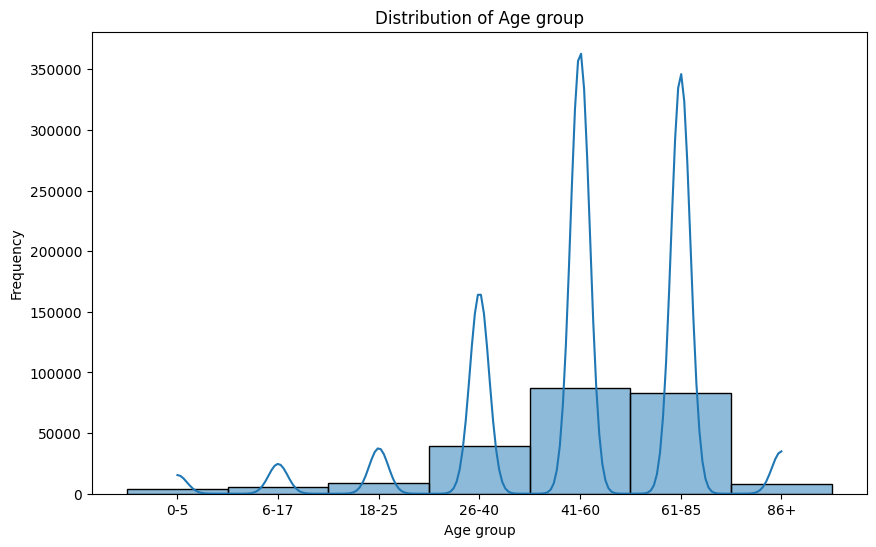

In [46]:
import seaborn as sns
# Example: Histogram of a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Distribution of Age group')
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.show()

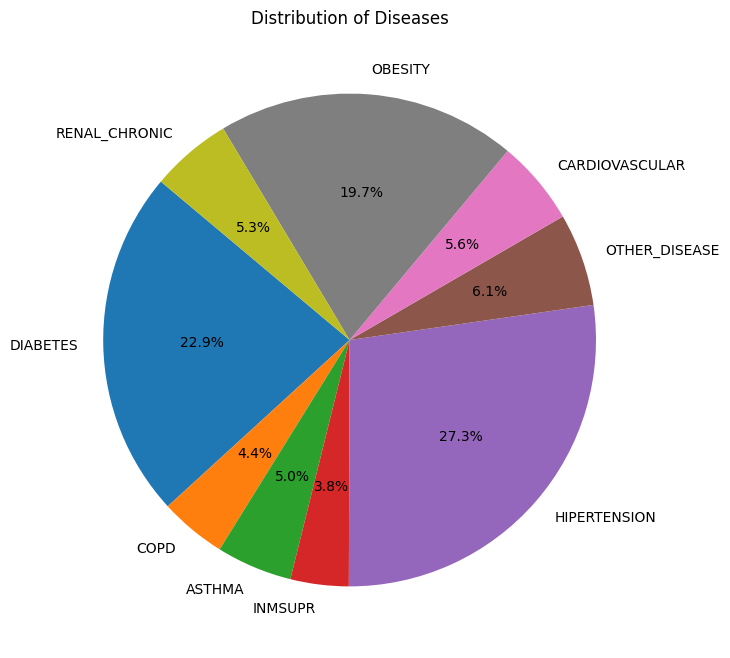

In [55]:
df_disease = df[['DIABETES', 'COPD', 'ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC' ]] == 1
count_true = df_disease.sum()

# สร้าง Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(count_true, labels=count_true.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diseases')
plt.show()

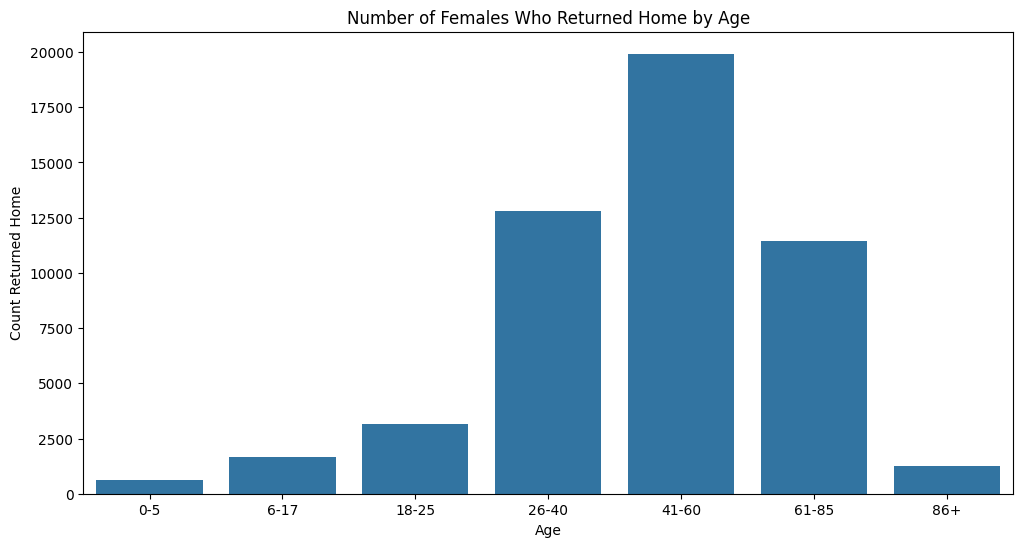

In [93]:
# Assuming you've already calculated female_return_home_counts

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='AGE', y='Count_Returned_Home', data=female_return_home_counts)
plt.title('Number of Females Who Returned Home by Age')
plt.xlabel('Age')
plt.ylabel('Count Returned Home')
plt.show()

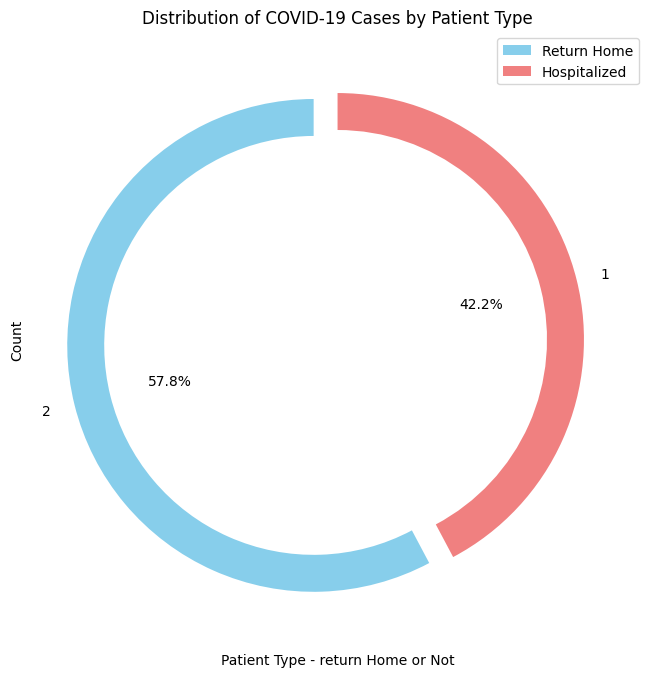

In [78]:
# Pie chart
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Not Registered')
# Plot the pie chart
df['PATIENT_TYPE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.15), explode=explode, colors=colors)
# Add labels and title
plt.title('Distribution of COVID-19 Cases by Patient Type')
plt.xlabel('Patient Type - return Home or Not')
plt.ylabel('Count')
# Add a legend
plt.legend(labels=['Return Home', 'Hospitalized'], loc='upper right')

plt.show()

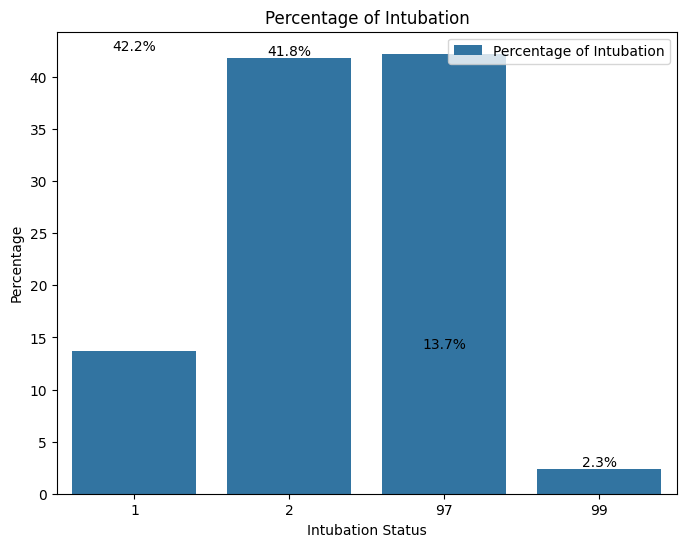

In [92]:
# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=intubation_percentage.index, y=intubation_percentage.values, dodge=False, label='Percentage of Intubation')

# Add labels and title
plt.title('Percentage of Intubation')
plt.xlabel('Intubation Status')
plt.ylabel('Percentage')

# Annotate each bar with the corresponding percentage
for i, value in enumerate(intubation_percentage):
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom')

# Display the legend
plt.legend()
plt.show()

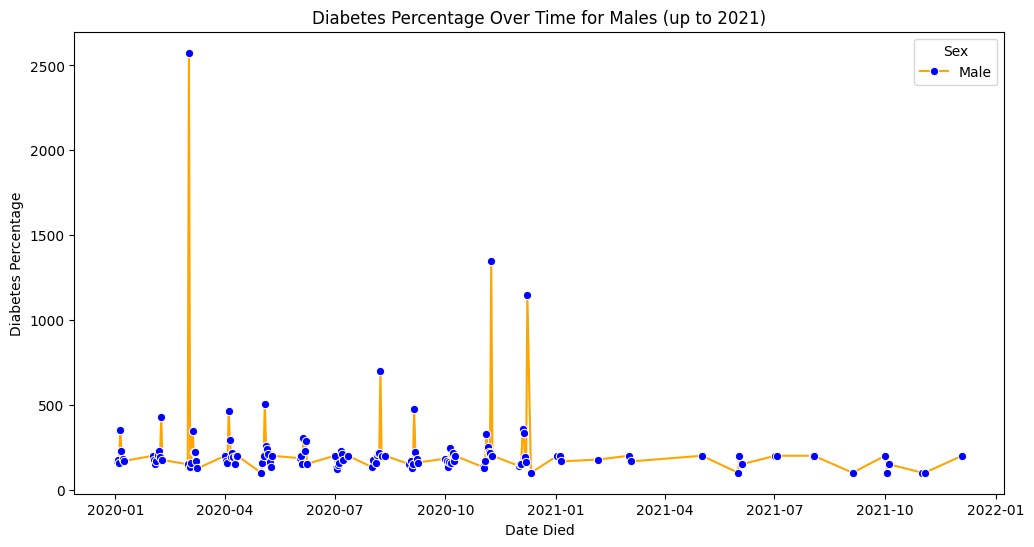

In [154]:
# Convert 'DATE_DIED' to datetime type
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')
# Filter data for males and females up to the year 2021
male_data = df[(df['SEX'] == 1) & (df['DATE_DIED'] <= '2021-12-31')]
# Calculate diabetes percentage for males and females over time
female_diabetes_percentage = female_data.groupby('DATE_DIED')['DIABETES'].mean() * 100
# Line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=male_diabetes_percentage.index, y=male_diabetes_percentage.values, label='Male', color='orange', marker='o',markerfacecolor='blue')
# Add labels and title
plt.title('Diabetes Percentage Over Time for Males (up to 2021)')
plt.xlabel('Date Died')
plt.ylabel('Diabetes Percentage')
plt.legend(title='Sex')

plt.show()

### Conclusion 

In this dataset analysis, we explored and processed a COVID-19 dataset, focusing on factors such as patient demographics, patient type, and diabetes prevalence. The analysis involved several steps, including data cleaning, visualization, and drawing insights from the trends observed.
andling Missing Values: Missing values in the dataset were addressed by either imputing values or removing rows as appropriate.
Removing Outliers: Outliers were identified and removed to ensure the dataset's integrity and avoid skewing the analysis.
Patient Demographics:

Age Distribution: The dataset provided insights into the age distribution of COVID-19 patients, with a focus on understanding the age groups most affected.
Gender Distribution: The gender distribution was analyzed to observe any gender-based trends in COVID-19 cases.
Patient Type:

Hospital vs. Home Isolation: Patient types were categorized into hospital and home isolation, shedding light on the distribution of treatment approaches.
Diabetes Prevalence:

Diabetes Distribution: The dataset allowed us to explore the prevalence of diabetes among COVID-19 patients, providing valuable information for understanding the comorbidity.
Temporal Analysis:

Time Series Analysis: The temporal aspect was considered by analyzing trends over time, especially focusing on patient outcomes and comorbidity prevalence.
Yearly Trends: A yearly analysis was conducted to observe any variations or patterns in COVID-19 cases over different years.
Data Visualization:

Line Charts: Line charts were employed to visualize age distribution, patient type trends, and diabetes prevalence over time for both genders.
Bar Charts: Bar charts were used to display categorical distributions such as patient types and gender ratios.
    
__Insights Drawn:__

Age Impact:The age distribution analysis revealed insights into the vulnerability of different age groups to COVID-19.

Gender Disparities:
Gender-based analysis provided information on how COVID-19 affects males and females differently.
Temporal Trends: Temporal analysis allowed us to identify trends and patterns in COVID-19 cases and outcomes over time.

__Recommendations:__

Healthcare Planning: Insights from the analysis can inform healthcare planning by identifying age groups and genders most at risk.
Public Health Initiatives: 
Understanding patient types and comorbidities can guide public health initiatives and interventions.
In conclusion, this dataset analysis provides valuable insights into the demographics, patient types, and comorbidities associated with COVID-19 cases. The findings can contribute to better-informed decision-making in healthcare and public health efforts.